In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


nbUsers = 8
startNbUser = 1

allData = pd.DataFrame()
nameList = []

for i in range(startNbUser, startNbUser + nbUsers):
    nameList.append("user"+str(i))

conditionsList = ['0', '1', '2', '3']

for i in range(0, len(nameList)):
    
    results = None
    for j in range(0, len(conditionsList)):
        results = pd.read_csv('../DataCollection/Pilot/' + nameList[i] + '-' + conditionsList[j] + '.csv')
        results['Conditions'] = conditionsList[j]
        results['User'] = nameList[i]

        results.loc[((results['Conditions'] == '0') | (results['Conditions'] == '1')), 'Scale'] = 'Large'
        results.loc[((results['Conditions'] == '2') | (results['Conditions'] == '3')), 'Scale'] = 'Small'

        results.loc[((results['Conditions'] == '0') | (results['Conditions'] == '2')), 'Order'] = 'Up'
        results.loc[((results['Conditions'] == '1') | (results['Conditions'] == '3')), 'Order'] = 'Down'
        
        for k in range(0, 8):
            results.loc[k, 'TrialNumber'] = math.floor(results.index[k]/2) + 1
        
        results.loc[(results['Order'] == 'Up') & (results.index % 2 == 0), 'MinOrMax'] = 'minimum'
        results.loc[(results['Order'] == 'Up') & (results.index % 2 == 1), 'MinOrMax'] = 'maximum'
        results.loc[(results['Order'] == 'Down') & (results.index % 2 == 0), 'MinOrMax'] = 'maximum'
        results.loc[(results['Order'] == 'Down') & (results.index % 2 == 1), 'MinOrMax'] = 'minimum'
        

        
        allData = pd.concat([results, allData], axis = 0)

In [2]:
dataSorted = pd.DataFrame()
dataSorted = allData.sort_values(by = "Stiffness Staircase", ignore_index = True)

In [3]:
dataSorted.loc[(dataSorted['MinOrMax'] == 'minimum') & (dataSorted['Scale'] == 'Large'), 'Scales and Range'] = 'Large Object, Minimum'
dataSorted.loc[(dataSorted['MinOrMax'] == 'maximum') & (dataSorted['Scale'] == 'Large'), 'Scales and Range'] = 'Large Object, Maximum'

dataSorted.loc[(dataSorted['MinOrMax'] == 'minimum') & (dataSorted['Scale'] == 'Small'), 'Scales and Range'] = 'Small Object, Minimum'
dataSorted.loc[(dataSorted['MinOrMax'] == 'maximum') & (dataSorted['Scale'] == 'Small'), 'Scales and Range'] = 'Small Object, Maximum'

<AxesSubplot:ylabel='Stiffness Staircase'>

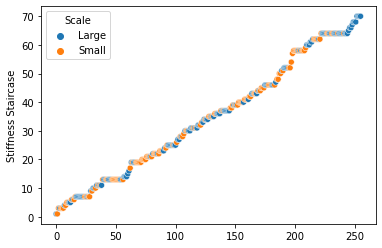

In [4]:
sns.scatterplot(data = dataSorted, x = dataSorted.index, y = "Stiffness Staircase", hue = "Scale")

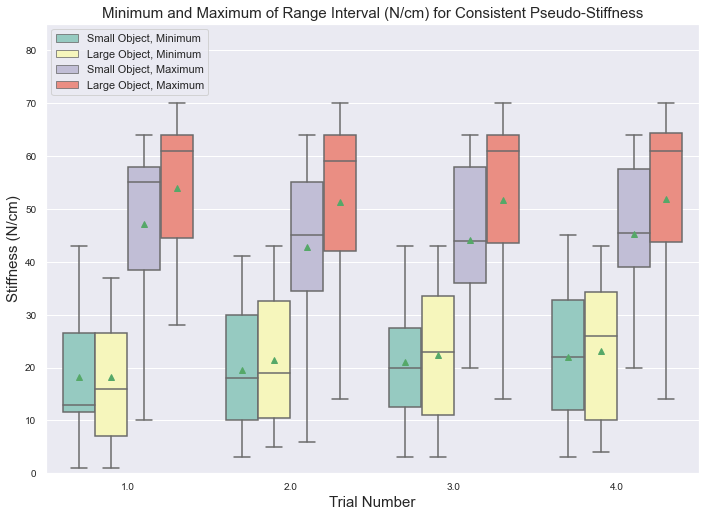

In [5]:
#boxplot min and max per objects' scale
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data = dataSorted, 
                x = 'TrialNumber', y = "Stiffness Staircase", hue = "Scales and Range", 
            hue_order = ['Small Object, Minimum', 'Large Object, Minimum', 'Small Object, Maximum', 'Large Object, Maximum'], showmeans = True, dodge = True, palette = 'Set3')

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
ax.set_ylim(0, 85)
plt.ylabel('Stiffness (N/cm)', fontsize = 15)
plt.xlabel('Trial Number', fontsize = 15)
plt.title('Minimum and Maximum of Range Interval (N/cm) for Consistent Pseudo-Stiffness', fontsize = 15)
plt.legend(loc = 'upper left')
plt.savefig('./ResultsPilot/rangeInterval.svg')

In [6]:
#Calcul 95CI
conditions = ['Small Object, Minimum', 'Small Object, Maximum', 'Large Object, Minimum', 'Large Object, Maximum']

sumMeUp = pd.DataFrame()
zvalue = 1.96

for i in range(0, len(conditions)):
    meanThis = dataSorted[dataSorted['Scales and Range'] == conditions[i]]['Stiffness Staircase'].mean()
    stdThis = dataSorted[dataSorted['Scales and Range'] == conditions[i]]['Stiffness Staircase'].std()
    countThis = dataSorted[dataSorted['Scales and Range'] == conditions[i]]['Stiffness Staircase'].count()
    ninetyFiveMe = zvalue*stdThis/math.sqrt(countThis)
    
    sumMeUp.loc[conditions[i], 'Mean'] = meanThis
    sumMeUp.loc[conditions[i], '95CI'] = ninetyFiveMe
    
    
sumMeUp = sumMeUp.transpose()

In [7]:
conditions = ['Small Object, Minimum', 'Small Object, Maximum', 'Large Object, Minimum', 'Large Object, Maximum']
quantitativeResults = pd.DataFrame()
for i in range(0, len(conditions)):
    perCond = pd.DataFrame()
    perCond[conditions[i]] = dataSorted[dataSorted['Scales and Range'] == conditions[i]]['Stiffness Staircase'].describe()
    quantitativeResults = pd.concat([perCond, quantitativeResults], axis = 1)
    
quantitativeResults = quantitativeResults.transpose()
quantitativeResults['95-CI'] = sumMeUp.transpose()['95CI']
quantitativeResults = quantitativeResults.transpose()

quantitativeResults


,"Large Object, Maximum","Large Object, Minimum","Small Object, Maximum","Small Object, Minimum"
count,64.000000,64.000000,64.000000,64.000000
mean,52.171875,21.296875,44.859375,20.187500
std,16.193821,12.626100,15.360088,12.479666
min,14.000000,1.000000,6.000000,1.000000
25%,43.000000,10.000000,36.000000,11.000000
50%,60.000000,20.000000,46.000000,19.000000
75%,64.000000,32.250000,58.000000,31.000000
max,70.000000,43.000000,64.000000,45.000000
95-CI,3.967486,3.093395,3.763221,3.057518


In [47]:
dataSorted[(dataSorted['MinOrMax'] == 'minimum') & (dataSorted['TrialNumber'] == 1.0)]['Stiffness Staircase'].std()/math.sqrt(16)*zvalue

5.674890364153416

In [48]:
dataSorted[(dataSorted['MinOrMax'] == 'minimum') & (dataSorted['TrialNumber'] == 1.0)]['Stiffness Staircase'].describe()

count    32.000000
mean     18.250000
std      11.581409
min       1.000000
25%       7.000000
50%      13.000000
75%      26.500000
max      43.000000
Name: Stiffness Staircase, dtype: float64

In [27]:
dataSorted[(dataSorted['MinOrMax'] == 'maximum') & (dataSorted['TrialNumber'] == 4.0) & (dataSorted['Scale'] == 'Small')]['Stiffness Staircase'].describe()

count    16.000000
mean     45.312500
std      14.046204
min      20.000000
25%      39.000000
50%      45.500000
75%      57.500000
max      64.000000
Name: Stiffness Staircase, dtype: float64

In [10]:
#Calcul 95CI
condMinMax = ['minimum', 'maximum']
sumMeUp = pd.DataFrame()
zvalue = 1.96

for i in range(0, len(condMinMax)):
    meanThis = allData[allData['MinOrMax'] == condMinMax[i]]['Stiffness Staircase'].mean()
    stdThis = allData[allData['MinOrMax'] == condMinMax[i]]['Stiffness Staircase'].std()
    countThis = allData[allData['MinOrMax'] == condMinMax[i]]['Stiffness Staircase'].count()
    ninetyFiveMe = zvalue*stdThis/math.sqrt(countThis)
    
    sumMeUp.loc[condMinMax[i], 'Mean'] = meanThis
    sumMeUp.loc[condMinMax[i], '95CI'] = ninetyFiveMe
    
    
sumMeUp = sumMeUp.transpose()

In [11]:
quantitativeResults = pd.DataFrame()
for i in range(0, 2):
    perCond = pd.DataFrame()
    perCond[condMinMax[i]] = dataSorted[dataSorted['MinOrMax'] == condMinMax[i]]['Stiffness Staircase'].describe()
    
    quantitativeResults = pd.concat([perCond, quantitativeResults], axis = 1)
    
    
quantitativeResults = quantitativeResults.transpose()
quantitativeResults['95-CI'] = sumMeUp.transpose()['95CI']
quantitativeResults = quantitativeResults.transpose()

quantitativeResults


,maximum,minimum
count,128.000000,128.000000
mean,48.515625,20.742188
std,16.143054,12.515972
min,6.000000,1.000000
25%,37.750000,10.750000
50%,52.000000,19.000000
75%,64.000000,32.000000
max,70.000000,45.000000
95-CI,2.796641,2.168281


Text(0.5, 1.0, 'Minimum and Maximum of Range Interval (N/cm) for Consistent Pseudo-Stiffness on Large Object')

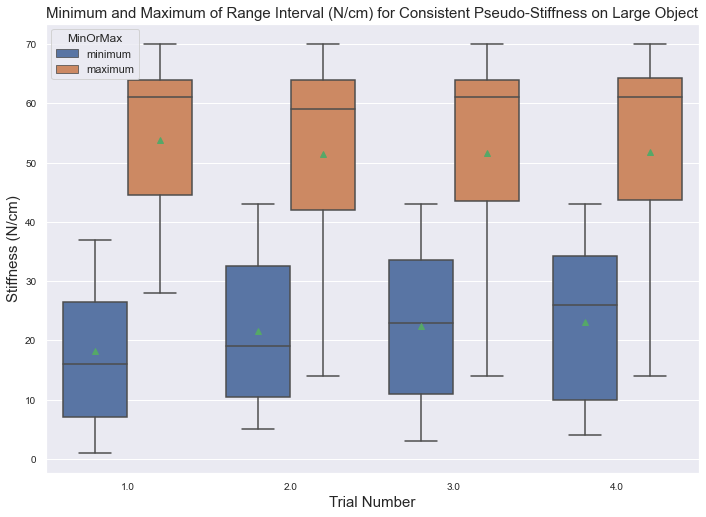

In [209]:
#boxplot Large objects
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = dataSorted[(dataSorted['Scale'] == 'Large')], 
                x = 'TrialNumber', y = "Stiffness Staircase", hue = "MinOrMax", showmeans = True)

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
#ax.set_ylim(1,8)
plt.ylabel('Stiffness (N/cm)', fontsize = 15)
plt.xlabel('Trial Number', fontsize = 15)
plt.title('Minimum and Maximum of Range Interval (N/cm) for Consistent Pseudo-Stiffness on Large Object', fontsize = 15)

Text(0.5, 1.0, 'Minimum and Maximum of Range Interval (N/cm) for Consistent Pseudo-Stiffness on Small Object')

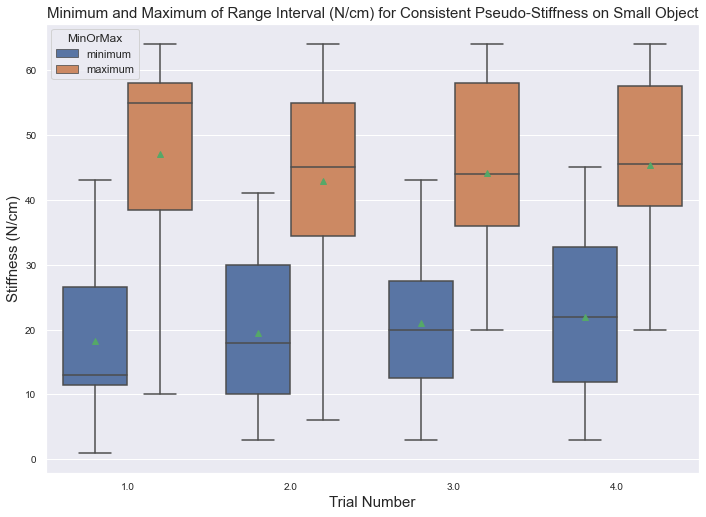

In [234]:
#boxplot small objects
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(data = dataSorted[(dataSorted['Scale'] == 'Small')], 
                x = 'TrialNumber', y = "Stiffness Staircase", hue = "MinOrMax", showmeans = True)


plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
#ax.set_ylim(1,8)
plt.ylabel('Stiffness (N/cm)', fontsize = 15)
plt.xlabel('Trial Number', fontsize = 15)
plt.title('Minimum and Maximum of Range Interval (N/cm) for Consistent Pseudo-Stiffness on Small Object', fontsize = 15)

<AxesSubplot:ylabel='Stiffness Staircase'>

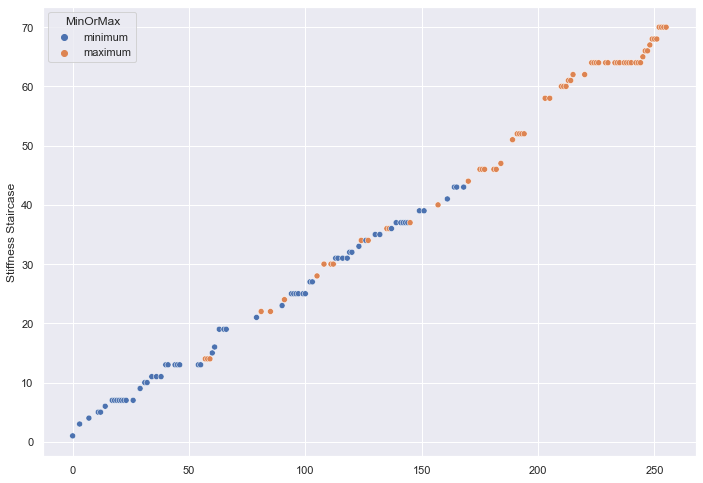

In [187]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = dataSorted[(dataSorted['Scale'] == 'Large')], 
                x = dataSorted[dataSorted['Scale'] == 'Large'].index, y = "Stiffness Staircase", hue = "MinOrMax")


<AxesSubplot:ylabel='Stiffness Staircase'>

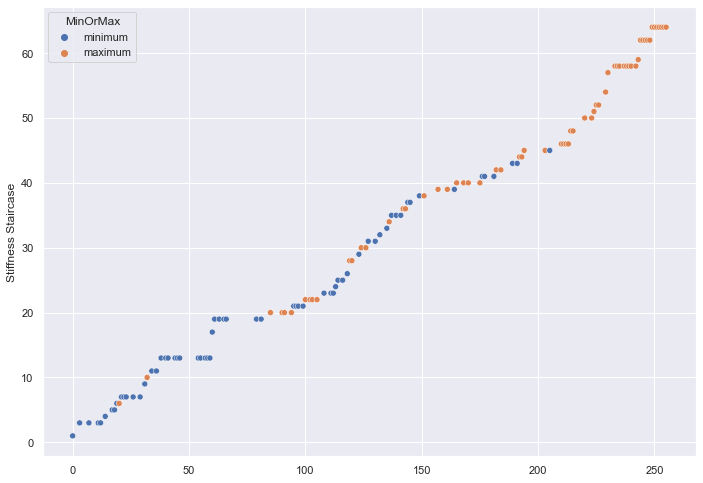

In [188]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = dataSorted[dataSorted['Scale'] == 'Small'], x = dataSorted[dataSorted['Scale'] == 'Large'].index, y = "Stiffness Staircase", hue = "MinOrMax")